<a href="https://colab.research.google.com/github/Cindygomo/Python/blob/main/2022_02_05_Databrunchnotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
sns.set(rc={"figure.figsize":(12.,6.)})

In [5]:
titanic = sns.load_dataset("titanic")

In [6]:
titanic.shape

(891, 15)

In [7]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [9]:
titanic.survived.value_counts(normalize=True)*100


0    61.616162
1    38.383838
Name: survived, dtype: float64

In [10]:
titanic.sex.value_counts(normalize=True)*100


male      64.758698
female    35.241302
Name: sex, dtype: float64

In [12]:
titanic.groupby(["sex","survived"])["who"].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: who, dtype: int64

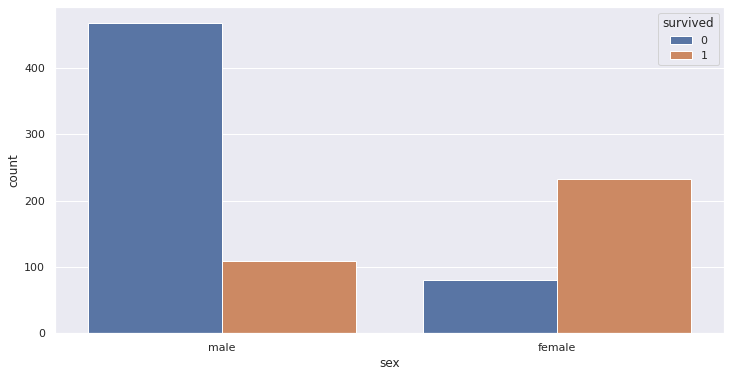

In [13]:
sns.countplot(x="sex", hue="survived", data=titanic);

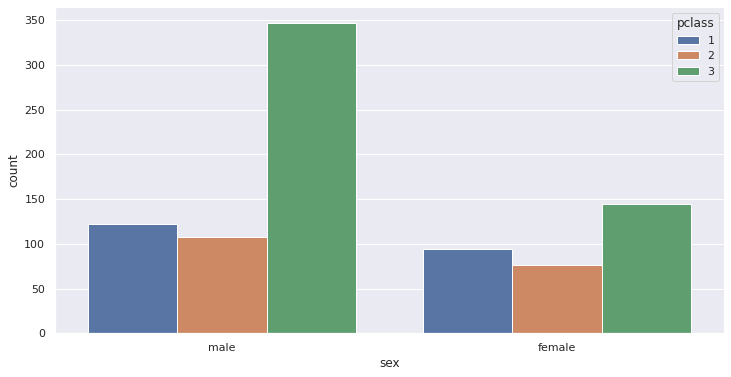

In [14]:
sns.countplot(x="alive", hue="pclass", data=titanic);

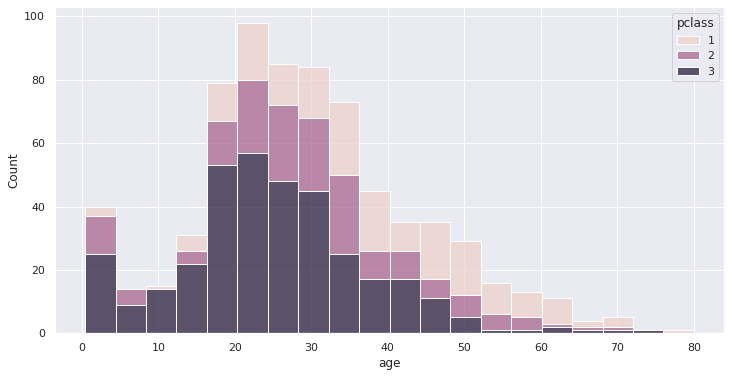

In [15]:
sns.histplot(x="age", hue="pclass", data=titanic, multiple="stack");

In [16]:
import requests

In [17]:
iss=requests.get("https://api.wheretheiss.at/v1/satellites/25544").json()

In [18]:
iss

{'altitude': 423.02468229524,
 'daynum': 2459615.9161111,
 'footprint': 4522.8197856313,
 'id': 25544,
 'latitude': -17.06503409567,
 'longitude': 177.79948998788,
 'name': 'iss',
 'solar_lat': -15.865917749636,
 'solar_lon': 33.697408841317,
 'timestamp': 1644055152,
 'units': 'kilometers',
 'velocity': 27565.763837209,
 'visibility': 'eclipsed'}

In [20]:
from geopy.geocoders import Nominatim as nm
geolocator=nm(user_agent="ras")
import folium as fo

In [21]:
latlong=[iss['latitude'],iss['longitude']]

In [22]:
latlong

[-17.06503409567, 177.79948998788]

In [23]:
loc=geolocator.reverse(f"{latlong[0],latlong[1]}")

In [24]:
loc

Location(Western, Viti, (-17.7770993, 177.44269339309957, 0.0))

In [25]:
map=fo.Map(location=latlong,zoom_start=5)

In [29]:
icon=fo.Icon(color="blue", prefix="fa", icon="rocket", icon_color="black")

In [30]:
data={"location":latlong, "tooltip":"La ISS", "icon":icon}

In [32]:
iss_marker=fo.Marker(**data)

In [33]:
iss_marker.add_to(map)

In [34]:
map